# **Data Visualization**


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-12-01 06:31:33--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  38.6MB/s    in 0.9s    

2022-12-01 06:31:35 (38.6 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Visualizing distribution of data


### Histograms


,ConvertedComp
count,1.058200e+04
mean,1.315967e+05
std,2.947865e+05
min,0.000000e+00
25%,2.686800e+04
50%,5.774500e+04
75%,1.000000e+05
max,2.000000e+06


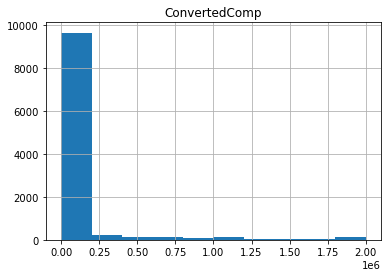

In [25]:
QUERY = '''SELECT ConvertedComp FROM master'''
df = pd.read_sql_query(QUERY,conn)
%matplotlib inline
df.hist()
df.describe()


### Box Plots


<AxesSubplot:>

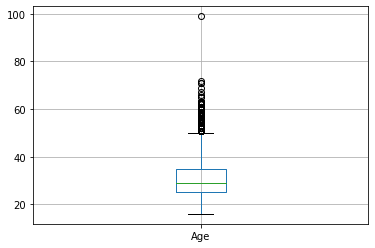

In [14]:
QUERY = '''SELECT Age FROM master'''
df = pd.read_sql_query(QUERY,conn)
df.boxplot()



## Visualizing relationships in data


### Scatter Plots


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

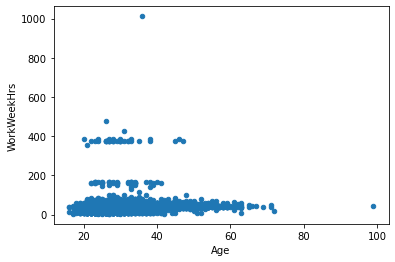

In [32]:
QUERY = '''SELECT Age, WorkWeekHrs FROM master'''
df = pd.read_sql_query(QUERY,conn)
df.plot.scatter(x = 'Age', y = 'WorkWeekHrs')


### Bubble Plots


Bubble plot of `WorkWeekHrs` and `CodeRevHrs`, using `Age` column as bubble size.


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

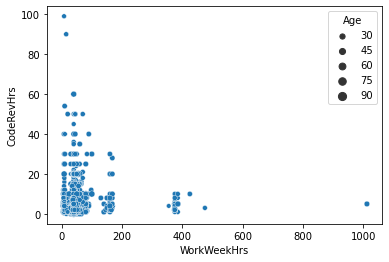

In [28]:
QUERY = '''SELECT Age, WorkWeekHrs, CodeRevHrs FROM master'''
df = pd.read_sql_query(QUERY,conn)
sns.scatterplot(data = df, x = 'WorkWeekHrs', y = 'CodeRevHrs', size = 'Age')


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year.


([<matplotlib.patches.Wedge at 0x7f0a16d6b790>,
 [Text(0.6179298981160039, 0.9100344174888911, 'Cassandra'),
  Text(-1.0448021179869733, 0.34407634944868715, 'Other(s):'),
  Text(-0.5812616204138278, -0.9338816459455082, 'Couchbase'),
  Text(0.3647811104755663, -1.037754663415305, 'Oracle'),
  Text(1.0141623985491341, -0.4259983912752109, 'MariaDB')],
 [Text(0.33705267169963843, 0.49638240953939505, '31.0%'),
  Text(-0.5698920643565308, 0.18767800879019297, '27.8%'),
  Text(-0.3170517929529969, -0.5093899886975498, '14.6%'),
  Text(0.1989715148048543, -0.56604799822653, '13.9%'),
  Text(0.5531794901177094, -0.23236275887738772, '12.7%')])

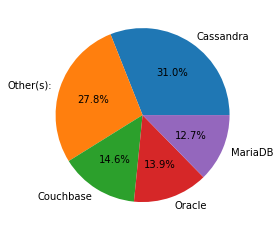

In [45]:
QUERY = '''SELECT * FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by Respondent DESC LIMIT(5)'''
df = pd.read_sql_query(QUERY,conn)
labels = df['DatabaseDesireNextYear']
data = df['Respondent']
plt.pie(data, labels = labels, autopct='%1.1f%%')



### Stacked Charts


Creating a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<AxesSubplot:xlabel='Age'>

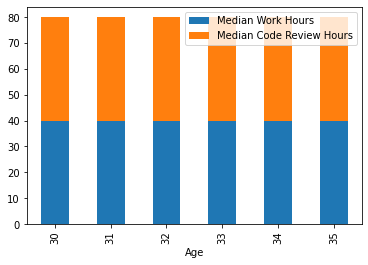

In [118]:
QUERY = '''SELECT Age, WorkWeekHrs, CodeRevHrs FROM master
WHERE Age BETWEEN 30 and 35'''

df = pd.read_sql_query(QUERY,conn)

Age = [30, 31, 32, 33, 34, 35]

medWork = df.groupby('Age')['WorkWeekHrs'].median()
newMedWork = medWork.reset_index(drop = True)

medCode = df.groupby('Age')['CodeRevHrs'].median()
newMedCode = medWork.reset_index(drop = True)

predf2 = {'Age':Age, 'Median Work Hours':newMedWork, 'Median Code Review Hours': newMedCode}
df2 = pd.DataFrame(predf2)

df2.head(10)
df2.plot.bar(x = 'Age', stacked = True)


## Visualizing comparison of data


### Line Chart


Plotting the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

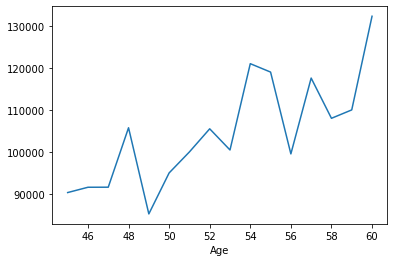

In [146]:
QUERY = '''SELECT Age, ConvertedComp FROM master
WHERE Age BETWEEN 45 and 60'''

df = pd.read_sql_query(QUERY,conn)

Age = list(range(45, 61))

medCC = df.groupby('Age')['ConvertedComp'].median()

medCC.plot.line( y = 'ConvertedComp')



### Bar Chart


<AxesSubplot:ylabel='MainBranch'>

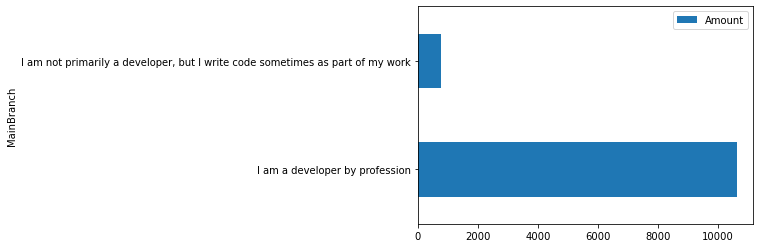

In [145]:
QUERY = '''SELECT MainBranch, Count(*) as Amount FROM master
Group by MainBranch'''

df = pd.read_sql_query(QUERY,conn)

df.plot.barh(x = 'MainBranch')



Close the database connection.


In [147]:
conn.close()